/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning:

The default value of regex will change from True to False in a future version.

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning:

The default value of regex will change from True to False in a future version.



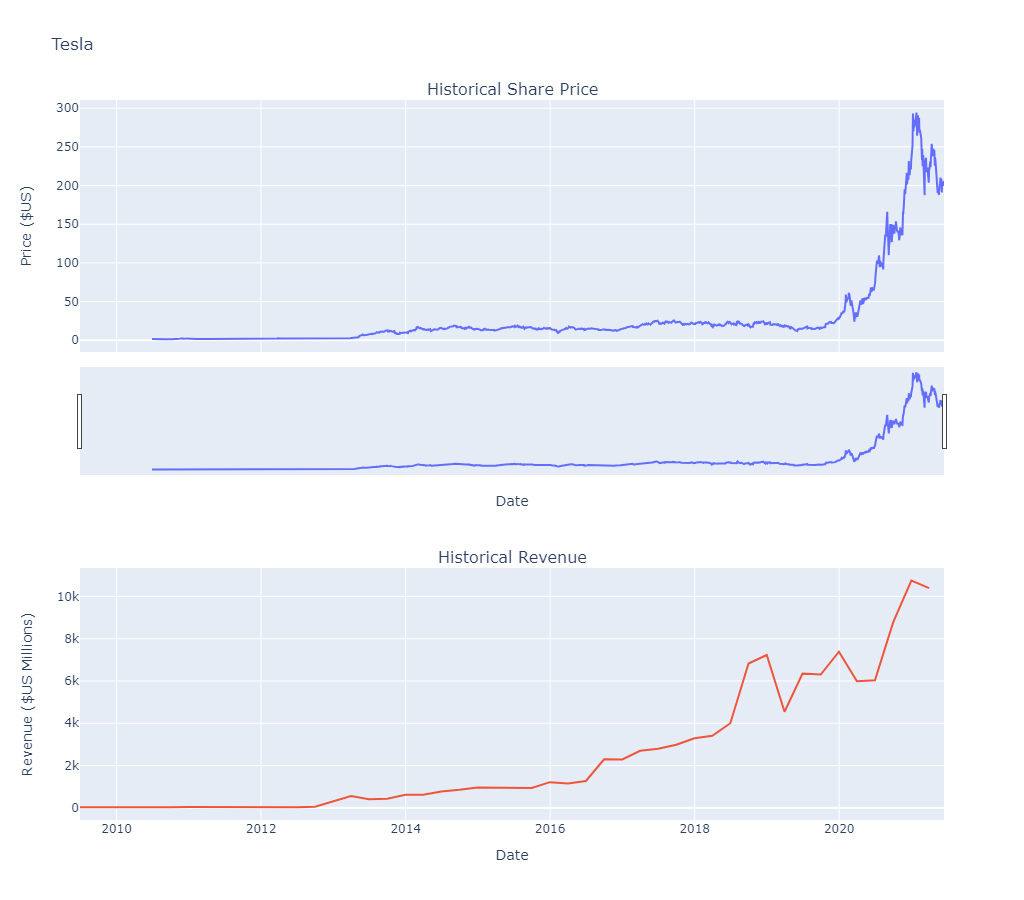

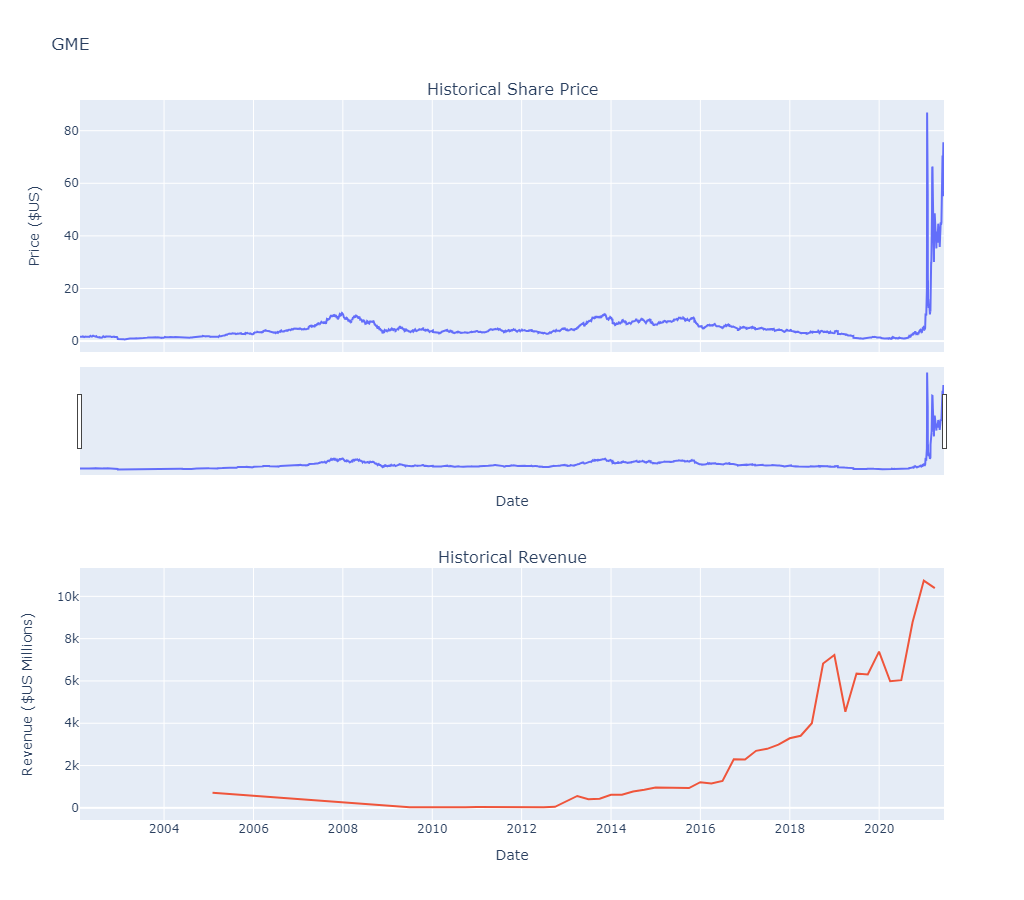

In [2]:
!pip install yfinance==0.2.4
!pip install pandas==1.3.3

import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = 'max')
tesla_data.reset_index(inplace=True)
tesla_data.head()

import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url=url).text
soup = BeautifulSoup(html_data, "html.parser")
table = soup.find_all("tbody")[1]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]


tesla_revenue.tail()

gme = yf.Ticker("GME")
gme_data = gme.history(period = 'max')
gme_data.reset_index(inplace=True)
gme_data.head()

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

table = soup.find_all("tbody")[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in table.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text
        gme_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
        
gme_revenue.tail()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')

make_graph(gme_data, gme_revenue, 'GME')

